In [0]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')


##5.Extensions for Reactions(>)

> 반응식의 SMILES 언어 <br>
`Reactant` > `Agent` > `Product`<br>
`Reactant` >> `Product`<br>
아래의 예시는 하나의 같은 반응을 의미합니다.

* C=CCBr >> C=CCI <br>
* [I-].[Na+].C=CCBr >> [Na+].[Br-].C=CCI <br>
* C=CCBr.[Na+].[I-] > CC(=O)C > C=CCI.[Na+].[Br-] <br>

그러나 이 반응에서 어느 위치의 `C`에 반응하는지 알 수 없습니다. 때문에 `Atom Maps`가 필요합니다.

![ReactionsNoMaps](http://www.daylight.com/dayhtml/doc/theory/disp.gif)

In [0]:
#RDkit 적용
from __future__ import print_function #2.X대 python호환을 위해
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw


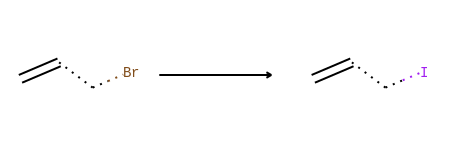

In [10]:
rxn = AllChem.ReactionFromSmarts('C=CCBr>>C=CCI')
rxn

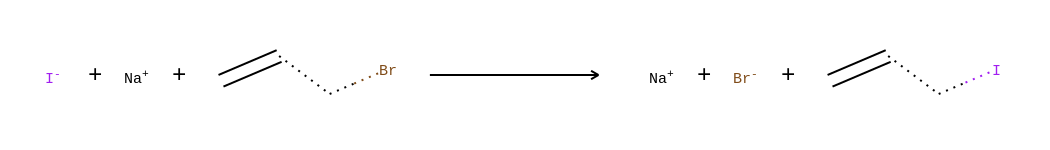

In [11]:
rxn = AllChem.ReactionFromSmarts('[I-].[Na+].C=CCBr >> [Na+].[Br-].C=CCI ')
rxn

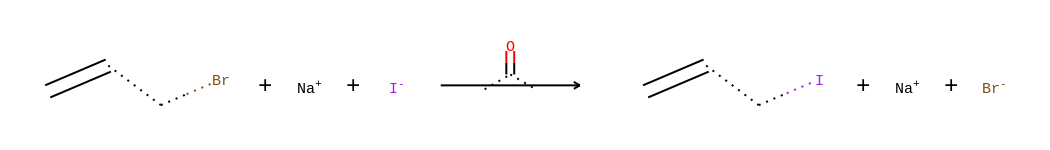

In [12]:
rxn = AllChem.ReactionFromSmarts('C=CCBr.[Na+].[I-] > CC(=O)C > C=CCI.[Na+].[Br-] ')
rxn

## 5.1 Reaction Atom Maps

> `Atom Map`은 컴퓨터가 반응물과 생성물사이의 같은 원자임을 알 수 있게 명확하게 표현해주는 방법입니다.

* 원하는 원자의 뒤에 `:`와 숫자를 이용해 표시합니다. ( `[CH3:2]` 는 `H`를 3개 가지고 있는 탄소에 2번을 부여함을 의미합니다.  )
* 부여한 숫자는 추가적인 성질을 나타내지 않습니다. 단지 구분짓기 위함입니다. ( 단, 모든 원자에 같은 숫자를 부여할 경우는 제외. )

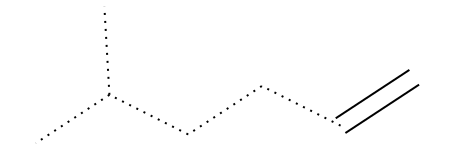

In [13]:
#Smarts로 표기
mol = AllChem.MolFromSmarts('C=CCCC(C)C')  # [CH2]=[CH][CH2][CH2][C](C)[CH2]
mol

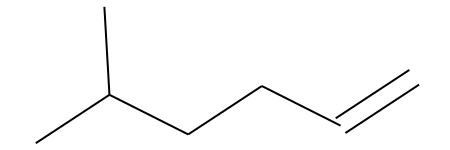

In [14]:
mol = AllChem.MolFromSmiles('C=CCCC(C)C')  # [CH2]=[CH][CH2][CH2][C](C)[CH2]
mol

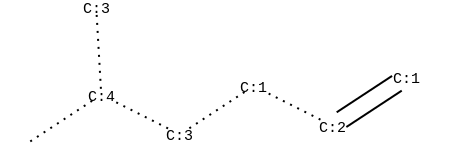

In [15]:
mol = AllChem.MolFromSmarts('[CH2:1]=[CH:2][CH2:1][CH2:3][C:4](C)[CH2:3]')
mol

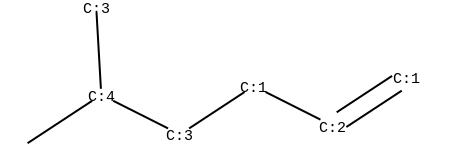

In [16]:
mol = AllChem.MolFromSmiles('[CH2:1]=[CH:2][CH2:1][CH2:3][C:4](C)[CH2:3]')
mol

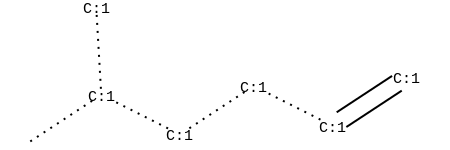

In [17]:
mol = AllChem.MolFromSmarts('[CH2:1]=[CH:1][CH2:1][CH2:1][C:1](C)[CH2:1]')
mol

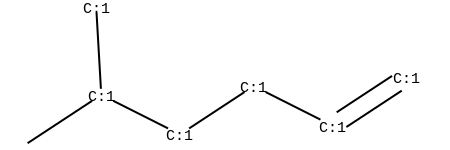

In [18]:
mol = AllChem.MolFromSmiles('[CH2:1]=[CH:1][CH2:1][CH2:1][C:1](C)[CH2:1]')
mol

## Atom Map은 유일하거나 완전하지 않습니다.

1. 반응이 일어날 때, 분자에 결합을 표현하는데 한계가 있습니다. <br>
예를들어 *Sodium Acetate* ( `CC(=O)[O-].[Na+]` ) 속의 산소원자를 화학적으로 구분할 수 없는데, *toolkit* 은 구별해주어야합니다.<br>
몇몇 시스템은 이런 동등함을 인정하는데, 이러한 경우에  같은 숫자로  `Mapping`합니다. ( `[CH3:1][C:2](=[O:3])[O-:3].[Na+:4]` )

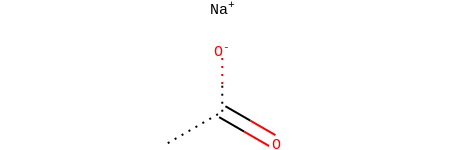

In [19]:
mol = AllChem.MolFromSmarts('CC(=O)[O-].[Na+]')
mol

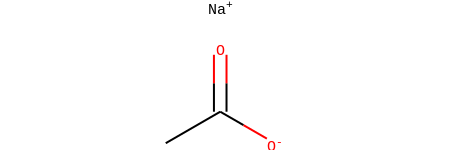

In [20]:
mol = AllChem.MolFromSmiles('CC(=O)[O-].[Na+]')
mol

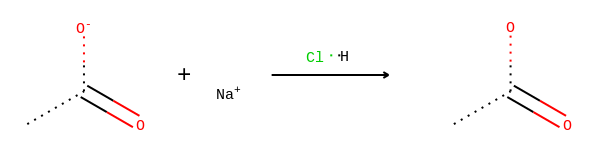

In [21]:
rxn = AllChem.ReactionFromSmarts('CC(=O)[O-].[Na+]>[H]Cl>CC(=O)O')
rxn

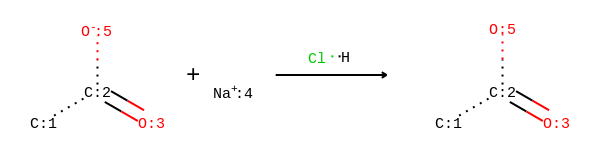

In [22]:
rxn = AllChem.ReactionFromSmarts('[CH3:1][C:2](=[O:3])[O-:5].[Na+:4]>[H]Cl>[CH3:1][C:2](=[O:3])[OH:5]')
rxn

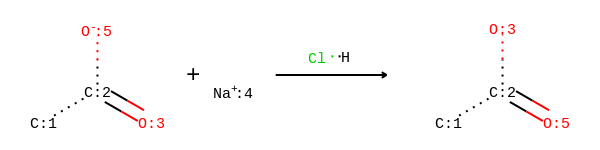

In [23]:
rxn = AllChem.ReactionFromSmarts('[CH3:1][C:2](=[O:3])[O-:5].[Na+:4]>[H]Cl>[CH3:1][C:2](=[O:5])[OH:3]')
rxn

2. 반응매커니즘이 애매할 때 (예를들어)<br> ![secondcase](http://www.daylight.com/dayhtml/doc/theory/cope.gif) <br>
이 경우 실제로는 두가지의 다른 반응 매커니즘이 있지만,  `[CH2:1]=[CH:2][CH2:1][CH2:3][C:4](C)[CH2:3]`으로 표현해줍니다.

3. 반응에 대한 정보가 부족한 경우. <br>
확실한 정보에 대해서 부분적으로만 `Mapping`합니다. 절대로 모르는 반응에 입력하려하면 안 됍니다.<br>
`Atom Map`은 `unique SMILES`에서 나타나지않습니다. <br>
4. `Atom Map`은 어떤 의미도 가지지않는 숫자일 뿐입니다.



## 5.2 Hydrogens

> 수소는 특별한 경우가 아니면 분자안에 숨어있습니다. 전하를 띄거나, 동위원소, 다른 수소와 결합, 다중결합을 하는 특별한 경우에 수소의 `atom map`이 필요하며, 이를 입력하면 수소를 `special`로 간주합니다.

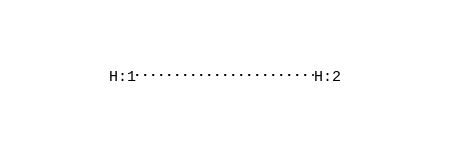

In [24]:
mol = AllChem.MolFromSmarts('[H:1][H:2]')
mol